In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'AuditData.csv')

In [3]:
from sklearn.model_selection import train_test_split

# Location ID is useless, check results with and without
# X = df.drop(['RISK_FLAG'], axis=1)
X = df.drop(['RISK_FLAG', 'LOCATION_ID'], axis=1)
y = df['RISK_FLAG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

# clf = DecisionTreeClassifier()

# clf = clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)


# accuracy = metrics.accuracy_score(y_test, y_pred)
# precision = metrics.precision_score(y_test, y_pred)
# recall = metrics.recall_score(y_test, y_pred)

# print("Accuracy:", round(accuracy, 2))
# print("Precision:", round(precision, 2))
# print("Recall:", round(recall, 2))

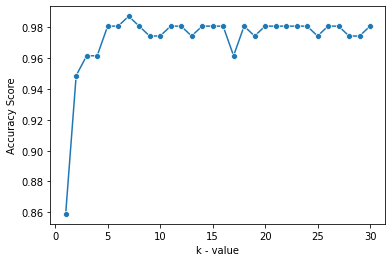

In [5]:
# Find optimal k value using cross validation
potentialDepth = [i for i in range (1,31)]
scores = []

for d in potentialDepth:
    clf = DecisionTreeClassifier(max_depth = d)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    
sns.lineplot(x = potentialDepth, y = scores, marker = 'o')
plt.xlabel("k - value")
plt.ylabel("Accuracy Score")

best_index = np.argmax(scores)
best_depth = potentialDepth[best_index]

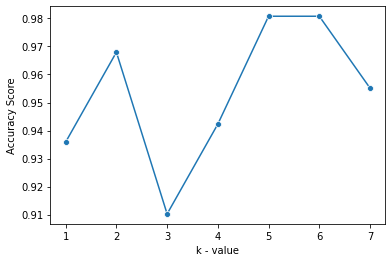

In [6]:
maxFeatures = [i for i in range (1,len(X_train.columns))]
scores = []

for f in maxFeatures:
    clf = DecisionTreeClassifier(max_depth = best_depth, max_features = f)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    
sns.lineplot(x = maxFeatures, y = scores, marker = 'o')
plt.xlabel("k - value")
plt.ylabel("Accuracy Score")

best_index = np.argmax(scores)
best_features = potentialDepth[best_index]

In [7]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))

Accuracy: 0.9808
Precision: 0.9524
Recall: 1.0


In [8]:
clf = DecisionTreeClassifier(max_depth = best_depth, max_features = best_features)

clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))

Accuracy: 0.9808
Precision: 0.9524
Recall: 1.0
